importing modules

In [233]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [235]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SVMSMOTE,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [236]:
from ydata_profiling import ProfileReport

reading in our data

In [237]:
path="/home/alpha/Downloads/ai4i2020.csv"
data=pd.read_csv(path)
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


dropping irrelevant colummns

In [238]:
data.drop(['UDI','Product ID'],inplace=True,axis=1)

renaming our columns

In [239]:
cols={
    'Air temperature [K]':"AirTemp",
    'Process temperature [K]':"ProcessTemp",
    'Rotational speed [rpm]':'RotationSpeed',
    'Torque [Nm]':'Torque',
    'Tool wear [min]':'ToolWear',
    'Machine failure':"MachineFailure"
}
data.rename(cols,inplace=True,axis=1)

In [240]:
data.head()

,Type,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [241]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            10000 non-null  object 
 1   AirTemp         10000 non-null  float64
 2   ProcessTemp     10000 non-null  float64
 3   RotationSpeed   10000 non-null  int64  
 4   Torque          10000 non-null  float64
 5   ToolWear        10000 non-null  int64  
 6   MachineFailure  10000 non-null  int64  
 7   TWF             10000 non-null  int64  
 8   HDF             10000 non-null  int64  
 9   PWF             10000 non-null  int64  
 10  OSF             10000 non-null  int64  
 11  RNF             10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB
None


In [242]:
print(data.isna().sum())

Type              0
AirTemp           0
ProcessTemp       0
RotationSpeed     0
Torque            0
ToolWear          0
MachineFailure    0
TWF               0
HDF               0
PWF               0
OSF               0
RNF               0
dtype: int64


In [243]:
#confirmation of no null valueds
data=data.replace("?",np.NaN)
data.isna().sum()

Type              0
AirTemp           0
ProcessTemp       0
RotationSpeed     0
Torque            0
ToolWear          0
MachineFailure    0
TWF               0
HDF               0
PWF               0
OSF               0
RNF               0
dtype: int64

from above we have no null or empty values

In [244]:
duplicates=data.duplicated().sum()
print(f"{duplicates}  duplicated rows")

0  duplicated rows


Numerical descriptive summary

In [245]:
for col in data.columns:
    try:
        data[col]=data[col].astype(float)
    except:
        pass
data.dtypes

Type               object
AirTemp           float64
ProcessTemp       float64
RotationSpeed     float64
Torque            float64
ToolWear          float64
MachineFailure    float64
TWF               float64
HDF               float64
PWF               float64
OSF               float64
RNF               float64
dtype: object

In [246]:
datanumeric=data.select_dtypes(include=np.number)
datanumeric.describe().T

,count,mean,std,min,25%,50%,75%,max
AirTemp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
ProcessTemp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
RotationSpeed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
ToolWear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
MachineFailure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


convert all numeric dtpes to float

In [247]:
failures=['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
datanumeric.drop(failures,axis=1,inplace=True)
datanumeric

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,MachineFailure
0,298.1,308.6,1551.0,42.8,0.0,0.0
1,298.2,308.7,1408.0,46.3,3.0,0.0
2,298.1,308.5,1498.0,49.4,5.0,0.0
3,298.2,308.6,1433.0,39.5,7.0,0.0
4,298.2,308.7,1408.0,40.0,9.0,0.0
...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,0.0
9996,298.9,308.4,1632.0,31.8,17.0,0.0
9997,299.0,308.6,1645.0,33.4,22.0,0.0
9998,299.0,308.7,1408.0,48.5,25.0,0.0


checking our target column

In [248]:
data['MachineFailure'].value_counts()

MachineFailure
0.0    9661
1.0     339
Name: count, dtype: int64

<Axes: xlabel='MachineFailure', ylabel='count'>

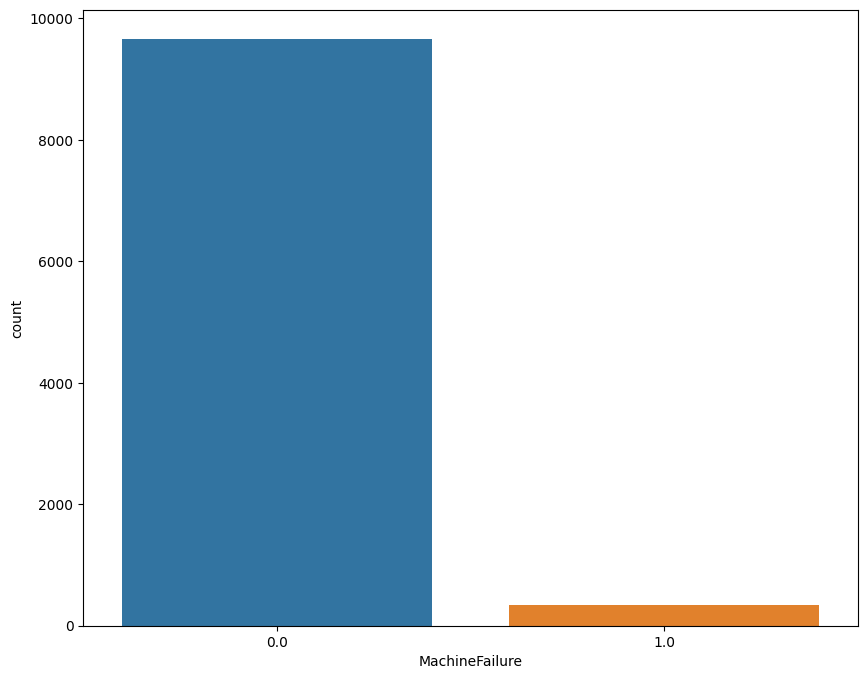

In [249]:
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data,x="MachineFailure",ax=ax)

we have an inbalanced targget column
apply SMOTE

machine failures by type(L,M,H)

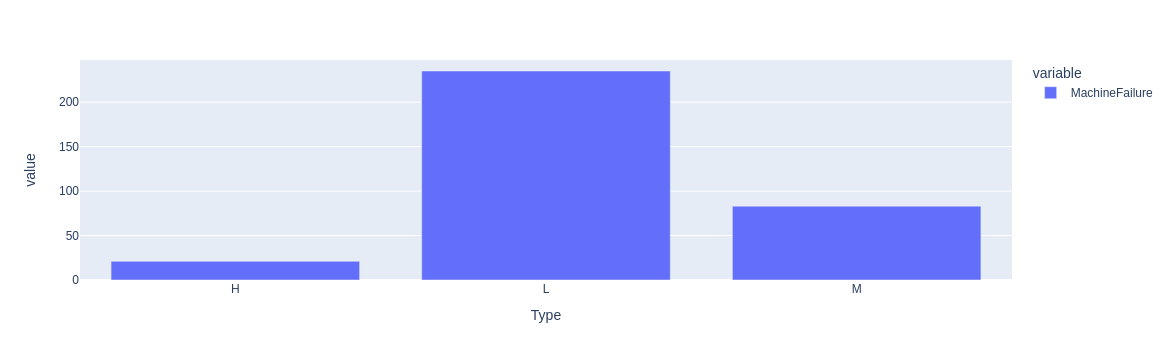

In [250]:
types=data.groupby("Type")["MachineFailure"].sum()
px.bar(types)

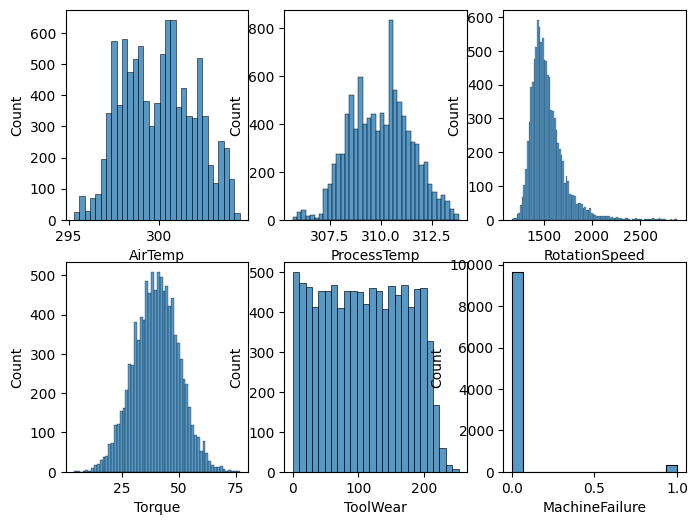

In [251]:
fig,ax=plt.subplots(2,3,figsize=(8,6))
for i,col in enumerate(datanumeric.columns):
    sns.histplot(datanumeric[col],ax=ax[i//3][i%3])

    

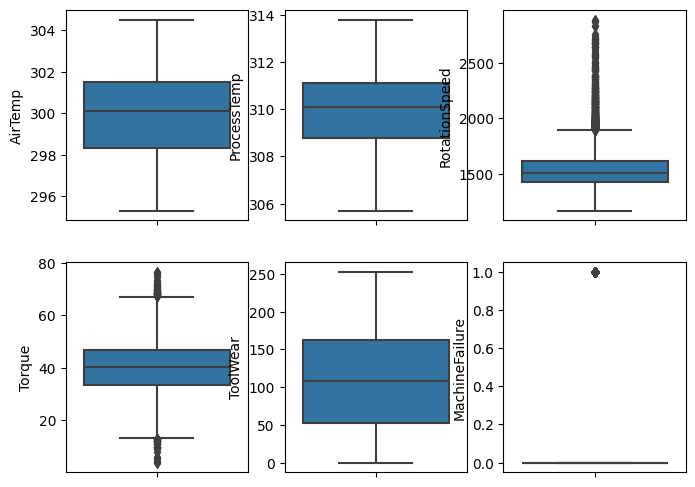

In [252]:
fig,axes=plt.subplots(2,3,figsize=(8,6))
for i,col in enumerate(datanumeric.columns):
    sns.boxplot(datanumeric,y=col,ax=axes[i//3][i%3])

boxplot with respect to machine failure

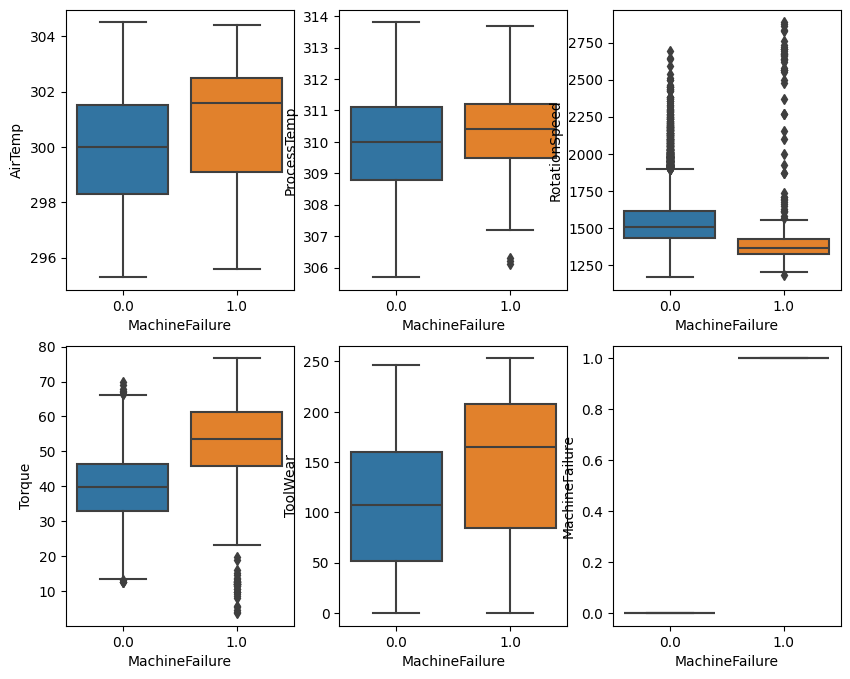

In [253]:
fig,axes=plt.subplots(2,3,figsize=(10,8))
for i,col in enumerate(datanumeric.columns):
    sns.boxplot(data,x='MachineFailure',y=col,ax=axes[i//3][i%3])

pairplots among features

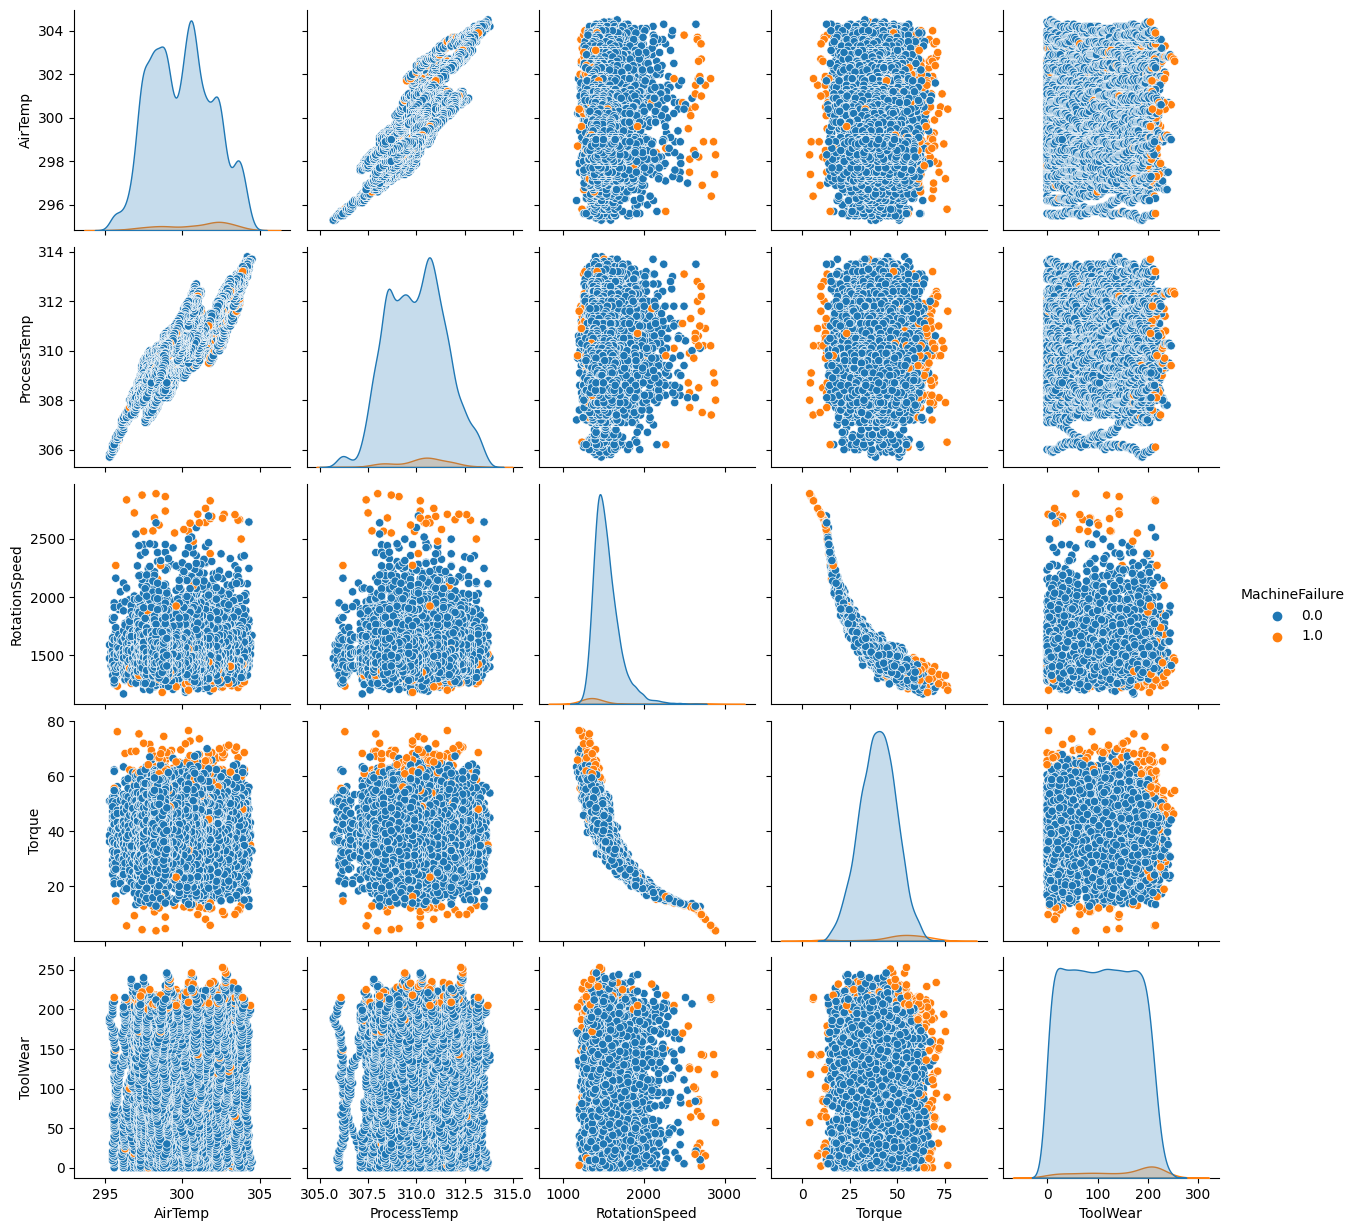

In [155]:
sns.pairplot(datanumeric, hue='MachineFailure')

correlation

<Axes: >

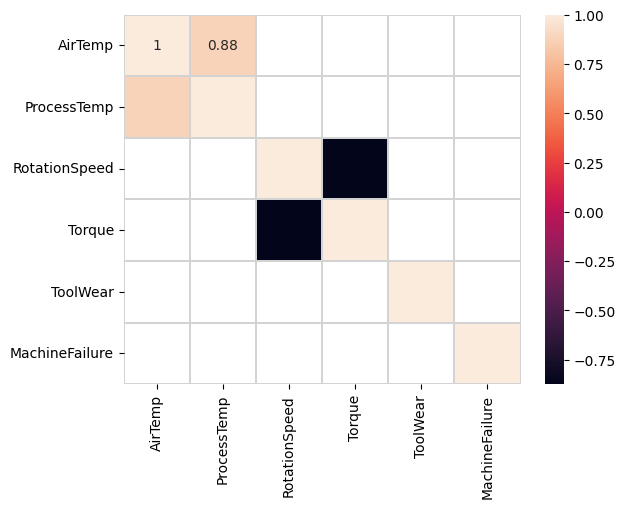

In [254]:
cor=datanumeric.corr()
threshold=0.8
mask=np.where(np.abs(cor)>=threshold,False,True)
sns.heatmap(cor,annot=True,mask=mask,linewidth=0.3,linecolor='lightgrey',)
#sns.heatmap(cor,annot=True)

PROFILE REPORT

In [255]:
data1=data.copy()

In [256]:
data1.drop(failures,axis=1,inplace=True)

In [257]:
report=ProfileReport(
    data1,
    title="Profile Report",
    dataset={
        "author":"Mark Ndung'u Njuguna",
    }
)

In [258]:
report.to_file('ProfileReport')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

del redundant rows

In [259]:
poor=data.loc[(data['MachineFailure']==1) & 
((data['TWF']==0)&(data['HDF']==0 )&(data['PWF']==0 )&(data['OSF']==0 )&(data['RNF']==0 ))]

In [260]:
poor=data.loc[(data['MachineFailure']==1) & 
((data['TWF']==0)&(data['HDF']==0 )&(data['PWF']==0 )&(data['OSF']==0 )&(data['RNF']==0 ))]
data.drop(poor.index,inplace=True)

In [261]:
data.loc[(data['MachineFailure']==0) & 
((data['TWF']==1)|(data['HDF']==1 )|(data['PWF']==1 )|(data['OSF']==1 )|(data['RNF']==1))]

,Type,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
1221,M,297.0,308.3,1399.0,46.4,132.0,0.0,0.0,0.0,0.0,0.0,1.0
1302,L,298.6,309.8,1505.0,45.7,144.0,0.0,0.0,0.0,0.0,0.0,1.0
1748,H,298.4,307.7,1626.0,31.1,166.0,0.0,0.0,0.0,0.0,0.0,1.0
2072,L,299.6,309.5,1570.0,35.5,189.0,0.0,0.0,0.0,0.0,0.0,1.0
2559,L,299.3,309.0,1447.0,50.4,140.0,0.0,0.0,0.0,0.0,0.0,1.0
3065,M,300.1,309.2,1687.0,27.7,95.0,0.0,0.0,0.0,0.0,0.0,1.0
3452,H,301.6,310.5,1602.0,32.3,2.0,0.0,0.0,0.0,0.0,0.0,1.0
5471,L,302.7,312.3,1346.0,61.2,170.0,0.0,0.0,0.0,0.0,0.0,1.0
5489,L,302.6,312.1,1499.0,35.0,215.0,0.0,0.0,0.0,0.0,0.0,1.0
5495,H,302.9,312.5,1357.0,55.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0


In [262]:
poor=data.loc[(data['MachineFailure']==0) & 
((data['TWF']==1)|(data['HDF']==1 )|(data['PWF']==1 )|(data['OSF']==1 )|(data['RNF']==1)),"MachineFailure"]=1

In [263]:
data['MachineFailure'].value_counts()

MachineFailure
0.0    9643
1.0     348
Name: count, dtype: int64

del failure types columns

In [264]:
failures=['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
data.drop(failures,axis=1,inplace=True)


splitting our data into train and test data

In [265]:
x=data.drop('MachineFailure',axis=1)
y=data['MachineFailure']

In [267]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=40,stratify=y,test_size=0.2)

In [268]:
cat=list(x.select_dtypes(np.object_))
num=list(x.select_dtypes(np.number))

In [269]:
from sklearn.compose import ColumnTransformer

In [270]:
full_pipe=ColumnTransformer(
    [
        ("numerical",StandardScaler(),list(x.select_dtypes(np.number))),
        ("categorical",OneHotEncoder(),list(x.select_dtypes(np.object_)))
    ]
)
#x_prep=full_pipe.fit_transform(xtrain)

In [271]:
model_pipe=Pipeline(
    [
        ("preprocessing",full_pipe),
        ("model",DecisionTreeClassifier(max_depth=12))
    ]
)


In [272]:
model_pipe.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['AirTemp', 'ProcessTemp',
                                                   'RotationSpeed', 'Torque',
                                                   'ToolWear']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Type'])])),
                ('model', DecisionTreeClassifier(max_depth=12))])

In [273]:
ypred=model_pipe.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1929
         1.0       0.78      0.71      0.75        70

    accuracy                           0.98      1999
   macro avg       0.89      0.85      0.87      1999
weighted avg       0.98      0.98      0.98      1999



In [274]:
model_stats=pd.DataFrame(columns=['accuracy','precision','recall','f1_score'])
def performer(model,ytest,ypred):
    accuracy=accuracy_score(ytest,ypred)
    precision = precision_score(ytest, ypred, average='weighted')
    recall = recall_score(ytest, ypred, average='weighted')
    f1 = f1_score(ytest, ypred, average='weighted')
    model_stats.loc[model]=[accuracy,precision,recall,f1]

In [275]:
performer(model_pipe,ytest,ypred)

In [276]:
model_stats

,accuracy,precision,recall,f1_score
"(ColumnTransformer(transformers=[('numerical', StandardScaler(),\n ['AirTemp', 'ProcessTemp', 'RotationSpeed',\n 'Torque', 'ToolWear']),\n ('categorical', OneHotEncoder(), ['Type'])]), DecisionTreeClassifier(max_depth=12))",0.982991,0.982366,0.982991,0.982624


In [277]:
model_pipe[0].get_feature_names_out()

array(['numerical__AirTemp', 'numerical__ProcessTemp',
       'numerical__RotationSpeed', 'numerical__Torque',
       'numerical__ToolWear', 'categorical__Type_H',
       'categorical__Type_L', 'categorical__Type_M'], dtype=object)

In [278]:
pr=pd.DataFrame(
    np.array([["L",298,308,1550,70,320]]),
    columns=x.columns
)
pr

,Type,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear
0,L,298,308,1550,70,320


In [279]:
predict=model_pipe.predict(pr)
predict

array([1.])

In [280]:
model_pipe.score(xtrain,ytrain)

0.9956206206206206

In [281]:
model_pipe.score(xtest,ytest)

0.9829914957478739

In [282]:
accuracy_score(ytest,ypred)

0.9829914957478739

In [283]:
precision_score(ytest,ypred)

0.78125

In [284]:
recall_score(ytest,ypred)

0.7142857142857143

In [285]:
f1_score(ytest,ypred)

0.746268656716418

In [286]:
model_pipe.classes_

array([0., 1.])

In [287]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1929
         1.0       0.78      0.71      0.75        70

    accuracy                           0.98      1999
   macro avg       0.89      0.85      0.87      1999
weighted avg       0.98      0.98      0.98      1999



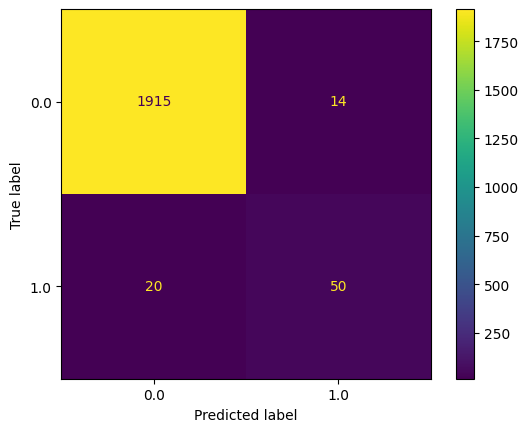

In [288]:
cm=confusion_matrix(ytest,ypred)
cmplot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_pipe.classes_)
cmplot.plot()

In [289]:
with open("pipeline_model.pkl",'wb') as mp:
    pickle.dump(model_pipe,mp)

FINAL PIPELINE MODEL

BACKTRACK

PART WE WERE TRYING OUT OTHER MODELS TO FIND THE BEST FITTER

In [49]:
columns=full_pipe.get_feature_names_out()
x_df=pd.DataFrame(x_prep,columns=columns)
x_df

,numerical__AirTemp,numerical__ProcessTemp,numerical__RotationSpeed,numerical__Torque,numerical__ToolWear,categorical__Type_H,categorical__Type_L,categorical__Type_M
0,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0.0,0.0,1.0
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0.0,1.0,0.0
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0.0,1.0,0.0
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0.0,1.0,0.0
4,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9986,-0.602257,-1.081857,0.363589,-1.051848,-1.475845,0.0,0.0,1.0
9987,-0.552262,-1.081857,0.519741,-0.821122,-1.428715,1.0,0.0,0.0
9988,-0.502267,-0.947078,0.592241,-0.660617,-1.350165,0.0,0.0,1.0
9989,-0.502267,-0.879689,-0.729478,0.854150,-1.303034,1.0,0.0,0.0


encoder=OneHotEncoder()
types=pd.DataFrame(encoder.fit_transform(np.array(data['Type']).reshape(-1,1)).toarray())
header=encoder.get_feature_names_out()
types.columns=header
data=pd.concat([data,types],axis=1)
data.drop("Type",axis=1,inplace=True)
categories=np.array(encoder.categories_).ravel()
scaler=StandardScaler()
scaled=scaler.fit_transform(x)
xscaled=pd.DataFrame(scaled,columns=x.columns)
xscaled

Applying SMOTE

In [52]:
ytrain.value_counts()

MachineFailure
0.0    7714
1.0     278
Name: count, dtype: int64

In [53]:
xtrain.shape

(7992, 8)

In [54]:
oversampler=SVMSMOTE(random_state=40)
xtrain,ytrain=oversampler.fit_resample(xtrain,ytrain)

In [55]:
ytrain.value_counts()

MachineFailure
0.0    7714
1.0    7714
Name: count, dtype: int64

In [56]:
xtrain

,numerical__AirTemp,numerical__ProcessTemp,numerical__RotationSpeed,numerical__Torque,numerical__ToolWear,categorical__Type_H,categorical__Type_L,categorical__Type_M
0,2.097474,2.220217,-0.417173,0.593330,-0.941703,0.000000,1.000000,0.0
1,-0.602257,-0.812300,-0.545441,0.051625,-0.706052,0.000000,0.000000,1.0
2,-1.052212,-1.081857,0.547626,-0.550269,1.304836,1.000000,0.000000,0.0
3,1.097573,1.074599,-0.026792,-0.279417,-1.051673,1.000000,0.000000,0.0
4,0.097673,0.939821,0.173975,-0.470017,0.472203,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
15423,-0.722894,-1.216635,-1.578197,2.153623,1.784850,0.000000,1.000000,0.0
15424,-1.484046,-1.486192,-0.888067,1.621191,1.477647,0.000000,1.000000,0.0
15425,0.117748,-0.124878,5.642402,-2.715666,-0.500400,1.114176,-0.114176,0.0
15426,1.145318,0.257806,7.138644,-3.408762,1.875144,0.000000,1.000000,0.0


MODEL CREATION

function to evaluate performance metrics

DECISION TREE

In [67]:
model=DecisionTreeClassifier()
params={"max_depth":[8,9,10,11,12,13]}
modelcv=GridSearchCV(model,params,cv=5)
modelcv.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13]})

In [68]:
results=pd.DataFrame(modelcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117653,0.017129,0.008891,0.001243,8,{'max_depth': 8},0.951069,0.965003,0.980233,0.979254,0.985413,0.972195,0.012547,6
1,0.107941,0.001414,0.008274,0.000256,9,{'max_depth': 9},0.955930,0.964355,0.980881,0.984117,0.986710,0.974399,0.012083,5
2,0.113377,0.002486,0.008289,0.000228,10,{'max_depth': 10},0.952690,0.971160,0.981529,0.983468,0.987034,0.975176,0.012422,4
3,0.117004,0.003296,0.008131,0.000045,11,{'max_depth': 11},0.955930,0.966623,0.983150,0.985413,0.986710,0.975565,0.012200,3
4,0.119018,0.004169,0.008083,0.000171,12,{'max_depth': 12},0.957874,0.967596,0.985094,0.986386,0.987034,0.976797,0.011902,2
5,0.120961,0.004463,0.008102,0.000057,13,{'max_depth': 13},0.956902,0.969864,0.985418,0.987034,0.987034,0.977250,0.012056,1


In [82]:
import pickle

In [87]:
model=DecisionTreeClassifier(max_depth=12)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model,ytest,ypred)

In [89]:
with open("ModelDecision.pkl","wb") as md:
    pickle.dump(model,md)

In [79]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=11),0.972986,0.977440,0.972986,0.974743
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=13),0.970485,0.976359,0.970485,0.972767
DecisionTreeClassifier(max_depth=8),0.957479,0.972126,0.957479,0.963021
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143


In [90]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1929
         1.0       0.57      0.76      0.65        70

    accuracy                           0.97      1999
   macro avg       0.78      0.87      0.82      1999
weighted avg       0.98      0.97      0.97      1999



KNN MODEL

In [91]:
model=KNeighborsClassifier()
params={"n_neighbors":range(2,10)}
modelcv=GridSearchCV(model,params,cv=5)
modelcv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10)})

In [92]:
modelcv.best_params_

{'n_neighbors': 2}

In [94]:
results=pd.DataFrame(modelcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039162,0.007446,0.711482,0.020119,2,{'n_neighbors': 2},0.962411,0.981854,0.988010,0.987358,0.991896,0.982306,0.010450,1
1,0.035160,0.000105,0.716655,0.004565,3,{'n_neighbors': 3},0.967272,0.981529,0.978937,0.982172,0.983468,0.978676,0.005890,2
2,0.035088,0.000277,0.732615,0.008072,4,{'n_neighbors': 4},0.963383,0.979909,0.981529,0.983793,0.984441,0.978611,0.007784,3
3,0.035338,0.000483,0.746008,0.014526,5,{'n_neighbors': 5},0.960143,0.977641,0.975697,0.977958,0.980875,0.974463,0.007349,5
4,0.036022,0.002069,0.743864,0.001870,6,{'n_neighbors': 6},0.960467,0.976993,0.978289,0.980551,0.983468,0.975954,0.008050,4
5,0.034911,0.000265,0.763088,0.019080,7,{'n_neighbors': 7},0.957874,0.974725,0.974076,0.975041,0.977634,0.971870,0.007102,7
6,0.035020,0.000407,0.764667,0.003156,8,{'n_neighbors': 8},0.956578,0.974076,0.975373,0.977634,0.979254,0.972583,0.008200,6
7,0.035061,0.000229,0.774660,0.007574,9,{'n_neighbors': 9},0.955282,0.972132,0.971808,0.973096,0.976985,0.969861,0.007520,8


In [98]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model,ytest,ypred)

In [99]:
with open("ModelKNN.pkl","wb") as md:
    pickle.dump(model,md)

In [97]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=11),0.972986,0.977440,0.972986,0.974743
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=13),0.970485,0.976359,0.970485,0.972767
DecisionTreeClassifier(max_depth=8),0.957479,0.972126,0.957479,0.963021
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=12),0.971486,0.976332,0.971486,0.973412
KNeighborsClassifier(n_neighbors=2),0.965983,0.966452,0.965983,0.966214
KNeighborsClassifier(n_neighbors=3),0.958479,0.967019,0.958479,0.962075


In [100]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1929
         1.0       0.51      0.53      0.52        70

    accuracy                           0.97      1999
   macro avg       0.75      0.76      0.75      1999
weighted avg       0.97      0.97      0.97      1999



Random Forest

In [113]:
model=RandomForestClassifier()
params={
    "n_estimators":range(80,100),
    'max_depth':range(6,12),
}
gridmodel=GridSearchCV(
    model,
    param_grid=params,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
gridmodel.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(6, 12),
                         'n_estimators': range(80, 100)},
             scoring='accuracy', verbose=1)

In [114]:
gridmodel.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=86)

In [115]:
gridmodel.best_params_

{'max_depth': 11, 'n_estimators': 86}

In [116]:
gridmodel.best_score_

0.9832778974634229

In [121]:
model=RandomForestClassifier(max_depth=11,n_estimators=86)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model[0],ytest,ypred)

In [119]:
performer(model[1],ytest,ypred)

In [122]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=11),0.972986,0.977440,0.972986,0.974743
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=13),0.970485,0.976359,0.970485,0.972767
DecisionTreeClassifier(max_depth=8),0.957479,0.972126,0.957479,0.963021
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=12),0.971486,0.976332,0.971486,0.973412
KNeighborsClassifier(n_neighbors=2),0.965983,0.966452,0.965983,0.966214
KNeighborsClassifier(n_neighbors=3),0.958479,0.967019,0.958479,0.962075
KNeighborsClassifier(n_neighbors=2),0.965983,0.966452,0.965983,0.966214
"DecisionTreeClassifier(max_depth=8, max_features='sqrt',\n random_state=1404486310)",0.964482,0.976189,0.964482,0.968727


BEST MODEL IS DECISION TREE,MAX_DEPTH=12

In [168]:
model_pipe=Pipeline(
    [
        ("preprocessing",full_pipe),
        ("model",DecisionTreeClassifier(max_depth=12))
    ]
)


In [170]:
xtrain

,numerical__AirTemp,numerical__ProcessTemp,numerical__RotationSpeed,numerical__Torque,numerical__ToolWear,categorical__Type_H,categorical__Type_L,categorical__Type_M
5158,2.097474,2.220217,-0.417173,0.593330,-0.941703,0.0,1.0,0.0
103,-0.602257,-0.812300,-0.545441,0.051625,-0.706052,0.0,0.0,1.0
9399,-1.052212,-1.081857,0.547626,-0.550269,1.304836,1.0,0.0,0.0
5666,1.097573,1.074599,-0.026792,-0.279417,-1.051673,1.0,0.0,0.0
7473,0.097673,0.939821,0.173975,-0.470017,0.472203,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9532,-0.252292,0.535485,1.200119,-0.871280,0.095161,0.0,0.0,1.0
2491,-0.502267,-0.812300,-0.874476,1.857307,1.430517,1.0,0.0,0.0
8006,0.447638,1.344156,-0.762939,1.074845,1.210576,0.0,0.0,1.0
7555,0.147668,0.737653,-1.052936,1.877370,0.346522,0.0,0.0,1.0


In [134]:
xtest

,numerical__AirTemp,numerical__ProcessTemp,numerical__RotationSpeed,numerical__Torque,numerical__ToolWear,categorical__Type_H,categorical__Type_L,categorical__Type_M
344,-1.252192,-1.216635,5.070467,-2.626804,-1.240194,0.0,0.0,1.0
2866,0.397643,-0.205797,-0.673709,0.663551,-1.507265,0.0,1.0,0.0
2802,0.047678,-0.340575,-0.495249,0.011499,-0.124780,0.0,1.0,0.0
4517,1.197563,0.265928,-0.461788,0.763866,0.299392,0.0,1.0,0.0
1507,-1.002217,-0.947078,-0.177367,-0.269385,1.713298,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3975,1.097573,0.872432,-0.160637,-0.339606,-0.266170,0.0,0.0,1.0
7983,0.547628,1.613713,1.506847,-1.493237,0.283682,0.0,0.0,1.0
6054,0.497633,0.737653,0.424934,-0.439922,0.786404,0.0,1.0,0.0
5708,1.097573,1.276767,0.318974,-0.199164,0.754984,0.0,1.0,0.0


In [114]:
ypred=model.predict(xtest)

In [115]:
model.score(xtrain,ytrain)

0.9834067928441794

In [116]:
model.score(xtest,ytest)

0.9634817408704353

In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1929
         1.0       0.50      0.83      0.62        70

    accuracy                           0.96      1999
   macro avg       0.74      0.90      0.80      1999
weighted avg       0.98      0.96      0.97      1999



In [119]:
accuracy_score(ytest,ypred)

0.9634817408704353

In [120]:
precision_score(ytest,ypred)

0.48739495798319327

In [121]:
recall_score(ytest,ypred)

0.8285714285714286

In [122]:
f1_score(ytest,ypred)

0.6137566137566137

In [126]:
importance=pd.DataFrame({
    'var':xtrain.columns,
    'importance':model.feature_importances_
}
)
importance.sort_values(by="importance",ascending=False)

,var,importance
2,RotationSpeed,0.394843
3,Torque,0.307861
4,ToolWear,0.119317
0,AirTemp,0.079654
1,ProcessTemp,0.058663
6,x0_L,0.025870
7,x0_M,0.011318
5,x0_H,0.002473


Feature importance

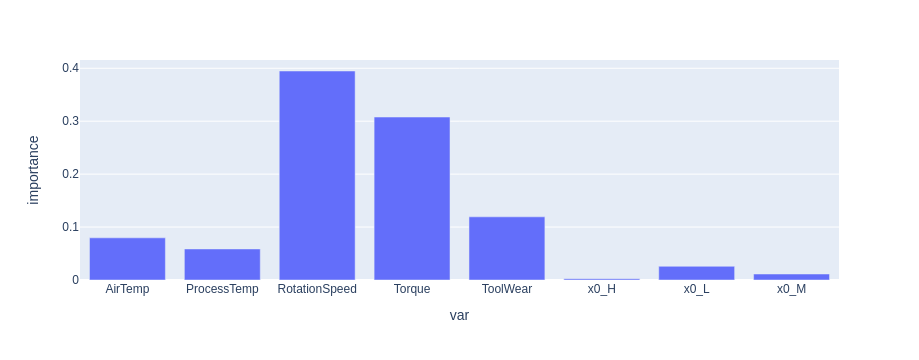

In [132]:
px.bar(importance,x="var",y="importance")

In [109]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=11),0.972986,0.977440,0.972986,0.974743
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=13),0.970485,0.976359,0.970485,0.972767
DecisionTreeClassifier(max_depth=8),0.957479,0.972126,0.957479,0.963021
DecisionTreeClassifier(max_depth=12),0.973487,0.977670,0.973487,0.975143
DecisionTreeClassifier(max_depth=12),0.971486,0.976332,0.971486,0.973412
KNeighborsClassifier(n_neighbors=2),0.965983,0.966452,0.965983,0.966214
KNeighborsClassifier(n_neighbors=3),0.958479,0.967019,0.958479,0.962075
KNeighborsClassifier(n_neighbors=2),0.965983,0.966452,0.965983,0.966214
"DecisionTreeClassifier(max_depth=8, max_features='sqrt',\n random_state=1404486310)",0.964482,0.976189,0.964482,0.968727
